In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

Read All Numpy File and Clustered DF Before

In [21]:
# numpy dataset
scaled_Xid = np.loadtxt('scaled_xid.csv', delimiter=',')
scaled_Xjp = np.loadtxt('scaled_xjp.csv', delimiter=',')
scaled_Xkr = np.loadtxt('scaled_xkr.csv', delimiter=',') 

# clustered dataset
indo_cluster = pd.read_csv('indo_cluster.csv')
indo_cluster.drop("Unnamed: 0",axis=1, inplace=True)
japan_cluster = pd.read_csv('japan_cluster.csv')
japan_cluster.drop("Unnamed: 0",axis=1, inplace=True)
korean_cluster = pd.read_csv('korean_cluster.csv')
korean_cluster.drop("Unnamed: 0",axis=1, inplace=True)

## Data Modelling

### Elbow Method

In [4]:
# elbow method, 
# parameter feature, range1 dan range2
def elbow_method(x, n1, n2):
    wcss= []

    for i in range(n1, n2):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                        n_init = 10, random_state = 0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)

    # vsualisasi plot
    plt.plot(range(n1, n2), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

Cari elbow method terbaik dari masing-masing data

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


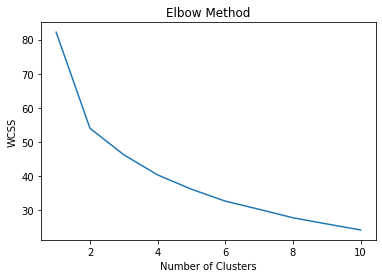

In [5]:
# lagu dari indonesia
elbow_method(scaled_Xid, 1, 11)

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


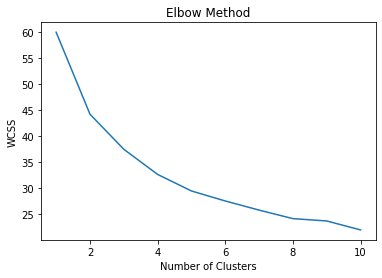

In [6]:
# lagu dari korea
elbow_method(scaled_Xkr, 1, 11)

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


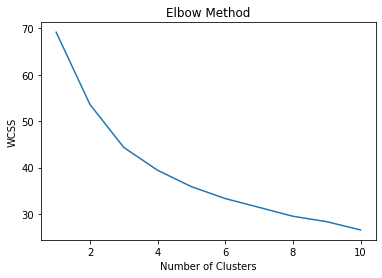

In [7]:
# lagu dari jepang
elbow_method(scaled_Xjp, 1, 11)

### K-Means Cluster Modelling
hasil terbaik berada pada cluster ke 5

In [10]:
# buat function model clustering
def cluster_modelling(x, n_clus):
    cluster_model = KMeans(n_clusters=n_clus, init='k-means++', max_iter=300, 
                           n_init=10, random_state=0)
    cluster_model.fit(x)

    # return model cluster
    return cluster_model

In [11]:
# clusteirng untuk lagu indo
kmean_id = cluster_modelling(scaled_Xid, 4)
id_label = kmean_id.predict(scaled_Xid)

In [12]:
np.unique(id_label, return_counts=True)

(array([0, 1, 2, 3]), array([73, 11, 54, 62], dtype=int64))

In [13]:
# clusteirng untuk lagu jepang
kmean_jp = cluster_modelling(scaled_Xjp, 4)
jp_label = kmean_jp.predict(scaled_Xjp)

In [14]:
np.unique(jp_label, return_counts=True)

(array([0, 1, 2, 3]), array([75, 41, 45, 39], dtype=int64))

In [15]:
# clusteirng untuk lagu korea
kmean_kr = cluster_modelling(scaled_Xkr, 4)
kr_label = kmean_kr.predict(scaled_Xkr)


In [16]:
np.unique(kr_label, return_counts=True)

(array([0, 1, 2, 3]), array([38, 27, 65, 70], dtype=int64))

### Masukan Label ke masing-masing dataset

In [22]:
# lagu - lagu di indonesia
indo_cluster['cluster'] = id_label
indo_cluster.head()

,artist name,track name,track id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,99,0.440,0.317,8,-9.258,1,0.0531,0.8910,0.000005,0.1410,0.268,169.914,233456,3,3
1,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,99,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303,4,2
2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,95,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822,4,0
3,Harry Styles,Late Night Talking,1qEmFfgcLObUfQm0j1W2CK,95,0.714,0.728,10,-4.595,1,0.0468,0.2980,0.000000,0.1060,0.901,114.996,177955,4,0
4,Charlie Puth,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,94,0.881,0.592,2,-4.898,1,0.0324,0.6190,0.000013,0.0901,0.719,101.058,154487,4,0


In [23]:
closest_id, _ = pairwise_distances_argmin_min(kmean_id.cluster_centers_, scaled_Xid)
closest_id

array([113, 196, 136,  90], dtype=int64)

In [24]:
# tampilkan isi dari masing-masing dataset
indo_cluster.iloc[[113, 196, 136,  90],[0,1,3,4,5,7,10,11,12,13,14,17]]

,artist name,track name,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,cluster
113,Tiko,Stressed Out,66,0.789,0.749,-5.995,0.174,0.000003,0.0806,0.822,117.935,0
196,Avery Alexander,Stealth (10 Year Anniversary Edition),10,0.441,0.283,-23.314,0.650,0.844000,0.1160,0.201,80.002,1
136,Tulus,Satu Kali,61,0.550,0.598,-7.298,0.117,0.000016,0.1470,0.436,150.020,2
90,Calum Scott,Heaven (feat. Lyodra),70,0.473,0.349,-6.852,0.619,0.000000,0.1090,0.390,117.697,3


In [25]:
# lagu - lagu di jepang
japan_cluster['cluster'] = jp_label
japan_cluster.head()

,artist name,track name,track id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,100,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,178567,4,0
1,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,99,0.440,0.317,8,-9.258,1,0.0531,0.8910,0.000005,0.1410,0.268,169.914,233456,3,3
2,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,99,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303,4,1
3,Bad Bunny,Ojitos Lindos,3k3NWokhRRkEPhCzPmV8TW,98,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,258299,4,2
4,Bad Bunny,Moscow Mule,6Xom58OOXk2SoU711L2IXO,97,0.804,0.674,5,-5.453,0,0.0333,0.2940,0.000001,0.1150,0.292,99.968,245940,4,3


In [26]:
closest_jp, _ = pairwise_distances_argmin_min(kmean_jp.cluster_centers_, scaled_Xjp)
closest_jp

array([149,  33, 136,  90], dtype=int64)

In [27]:
# tampilkan isi dari masing-masing dataset
japan_cluster.iloc[[149,  33, 136,  90],[0,1,3,4,5,7,10,11,12,13,14,17]]

,artist name,track name,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,cluster
149,Ayumu Imazu,Tangerine,60,0.746,0.700,-4.785,0.0454,0.000000,0.118,0.693,117.012,0
33,BTS,Born Singer,83,0.602,0.841,-3.334,0.0354,0.000000,0.235,0.684,157.937,1
136,Aimyon,双葉,61,0.600,0.794,-3.322,0.0387,0.000005,0.414,0.664,111.984,2
90,Yuuri,レオ,67,0.629,0.543,-6.281,0.3830,0.000000,0.127,0.403,93.043,3


In [28]:
# lagu - lagu di korean
korean_cluster['cluster'] = kr_label
korean_cluster.head()

,artist name,track name,track id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,99,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303,4,0
1,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,99,0.440,0.317,8,-9.258,1,0.0531,0.8910,0.000005,0.1410,0.268,169.914,233456,3,1
2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,95,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822,4,3
3,Harry Styles,Late Night Talking,1qEmFfgcLObUfQm0j1W2CK,95,0.714,0.728,10,-4.595,1,0.0468,0.2980,0.000000,0.1060,0.901,114.996,177955,4,3
4,Charlie Puth,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,94,0.881,0.592,2,-4.898,1,0.0324,0.6190,0.000013,0.0901,0.719,101.058,154487,4,2


In [29]:
closest_kr, _ = pairwise_distances_argmin_min(kmean_kr.cluster_centers_, scaled_Xkr)
closest_kr

array([ 65, 116,  51, 134], dtype=int64)

In [30]:
# tampilkan isi dari masing-masing dataset
korean_cluster.iloc[[ 65, 116,  51, 134], [0,1,3,4,5,7,10,11,12,13,14,17]]

,artist name,track name,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,cluster
65,Chris Jonex,Deja Que Tus Manos,78,0.538,0.785,-4.870,0.142,0.000000,0.3000,0.631,146.066,0
116,BIBI,"Very, Slowly",65,0.528,0.423,-7.381,0.678,0.001480,0.1670,0.249,135.917,1
51,Ed Sheeran,2step (feat. Lil Baby),81,0.693,0.643,-5.867,0.138,0.000000,0.1080,0.477,95.055,2
134,HEIZE,Undo,56,0.784,0.676,-4.836,0.201,0.000001,0.0903,0.734,116.103,3


## Feature Analysis

In [31]:
def compare_between_cluster(df, feature, feature_title):
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(df[df['cluster'] == 0][feature], label = 'Cluster 1')
    sns.distplot(df[df['cluster'] == 1][feature], label = 'Cluster 2')
    sns.distplot(df[df['cluster'] == 2][feature], label = 'Cluster 3')
    sns.distplot(df[df['cluster'] == 3][feature], label = 'Cluster 4')
    plt.title(feature_title)
    plt.legend()

### Membandingkan Karakteristik Fitur berdasarkan Cluster

#### Valence

d:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

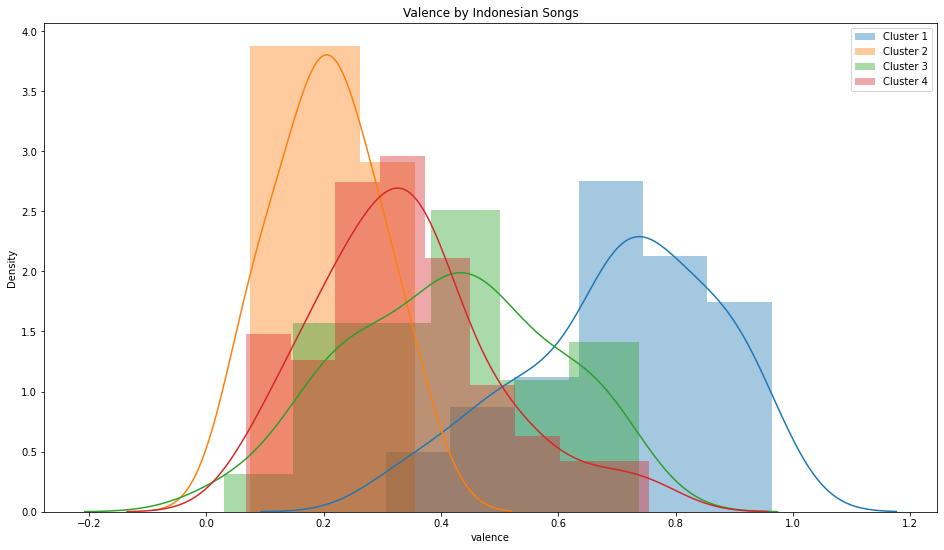

In [32]:
# valence dari lagu indo
compare_between_cluster(indo_cluster, 'valence', 'Valence by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

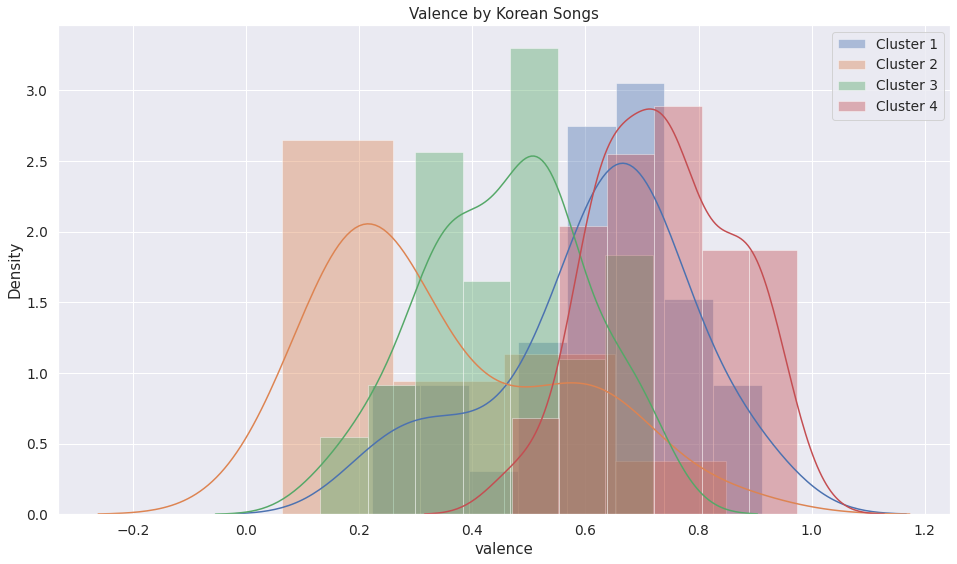

In [ ]:
# valence dari lagu korea
compare_between_cluster(korean_cluster, 'valence', 'Valence by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

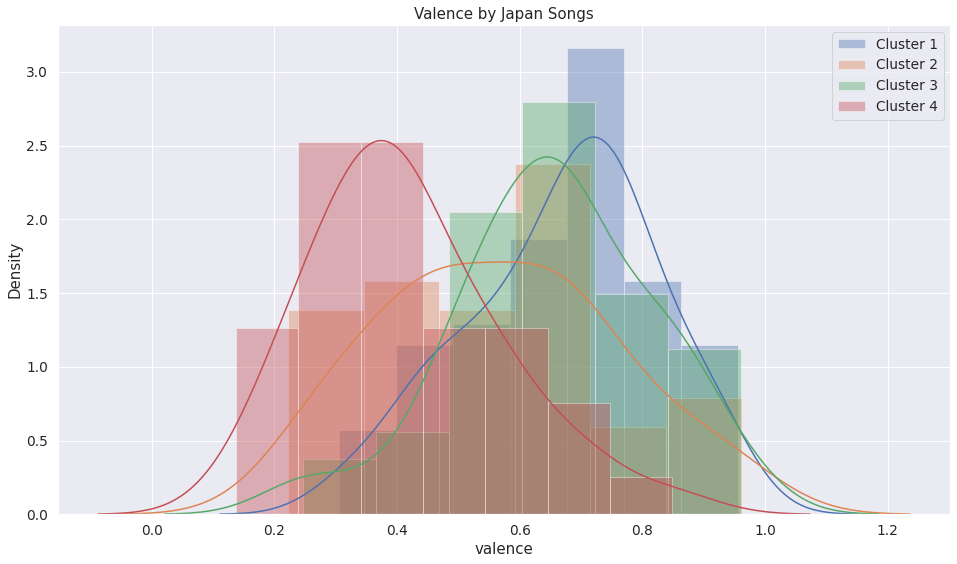

In [ ]:
# valence dari lagu japan
compare_between_cluster(japan_cluster, 'valence', 'Valence by Japan Songs')

#### Danceability

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

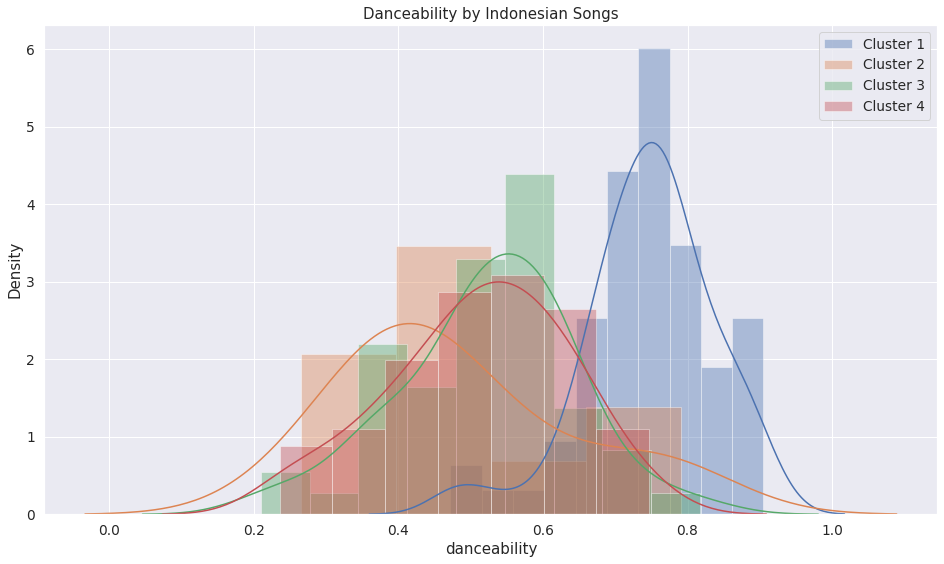

In [ ]:
# danceability dari lagu indonesia
compare_between_cluster(indo_cluster, 'danceability', 'Danceability by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

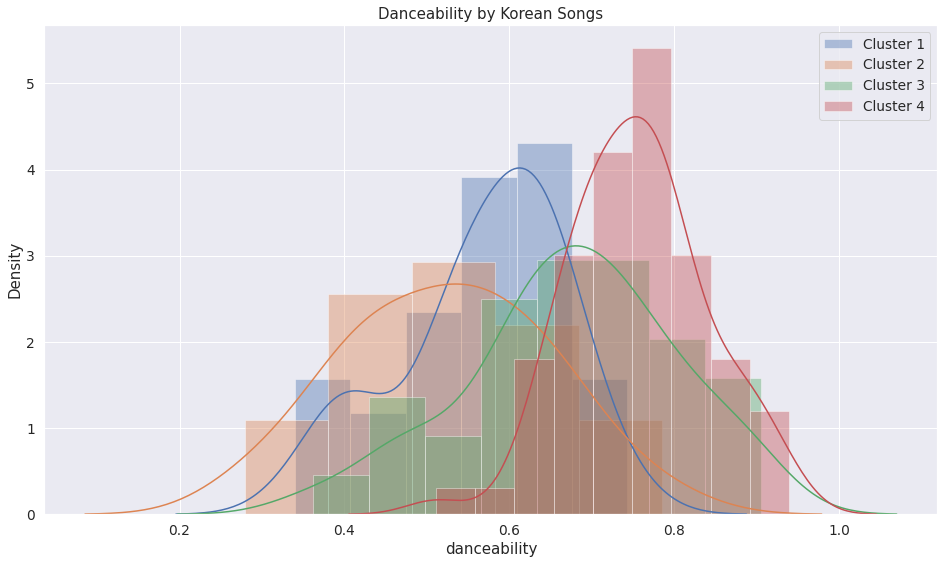

In [ ]:
# danceability dari lagu korea
compare_between_cluster(korean_cluster, 'danceability', 'Danceability by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

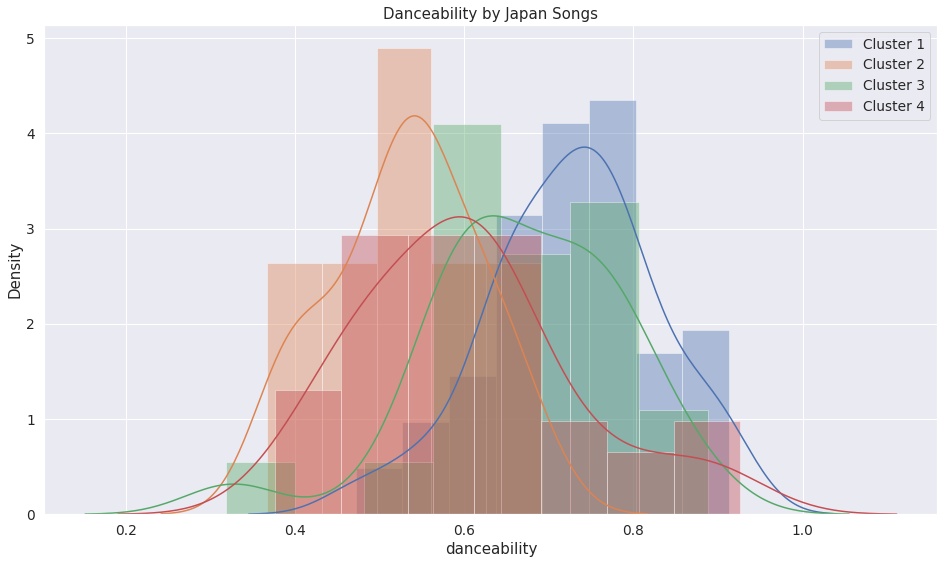

In [ ]:
# danceability dari lagu japan
compare_between_cluster(japan_cluster, 'danceability', 'Danceability by Japan Songs')

#### Energy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

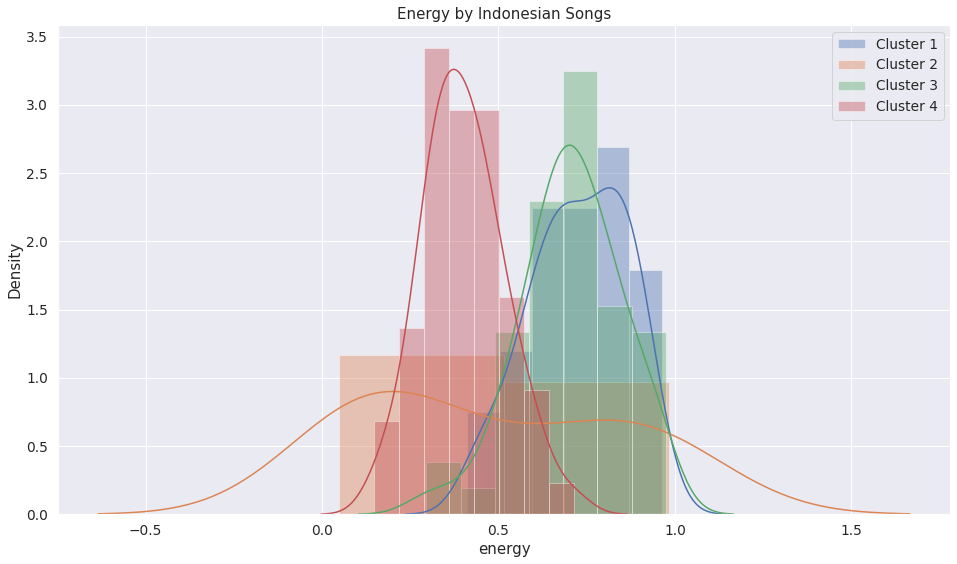

In [ ]:
# energy dari lagu indonesia
compare_between_cluster(indo_cluster, 'energy', 'Energy by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

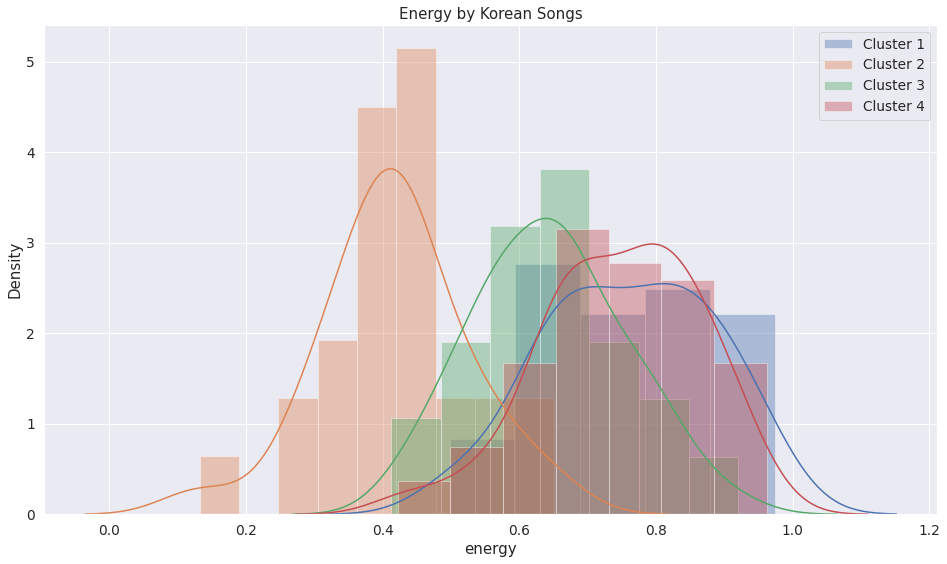

In [ ]:
# energy dari lagu korea
compare_between_cluster(korean_cluster, 'energy', 'Energy by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

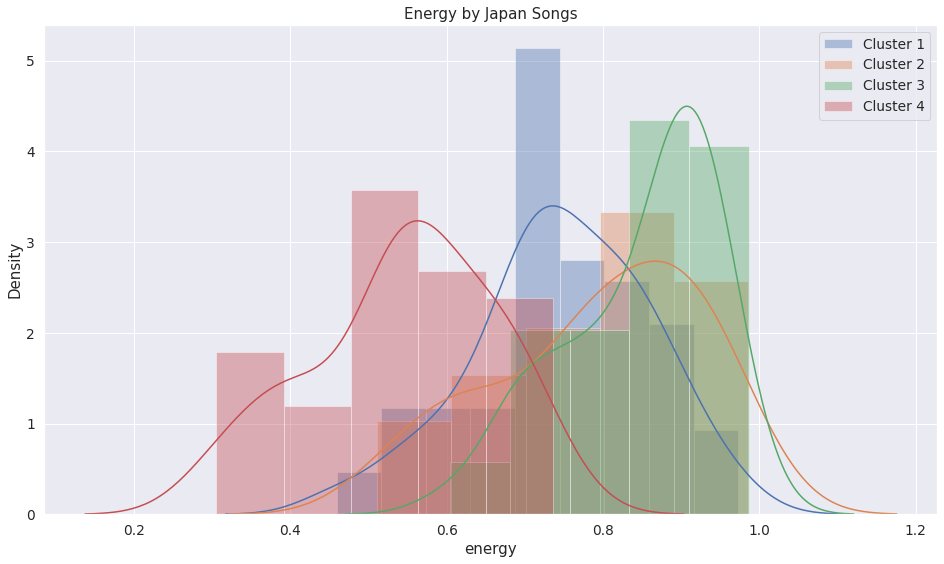

In [ ]:
# energy dari lagu jepang
compare_between_cluster(japan_cluster, 'energy', 'Energy by Japan Songs')

#### Loudness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

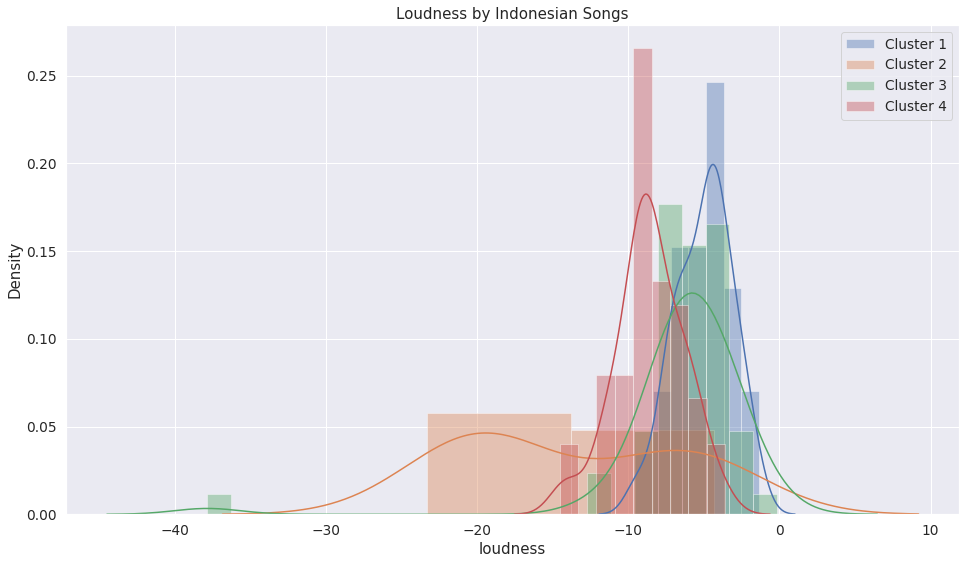

In [ ]:
# loudness dari lagu indonesia
compare_between_cluster(indo_cluster, 'loudness', 'Loudness by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

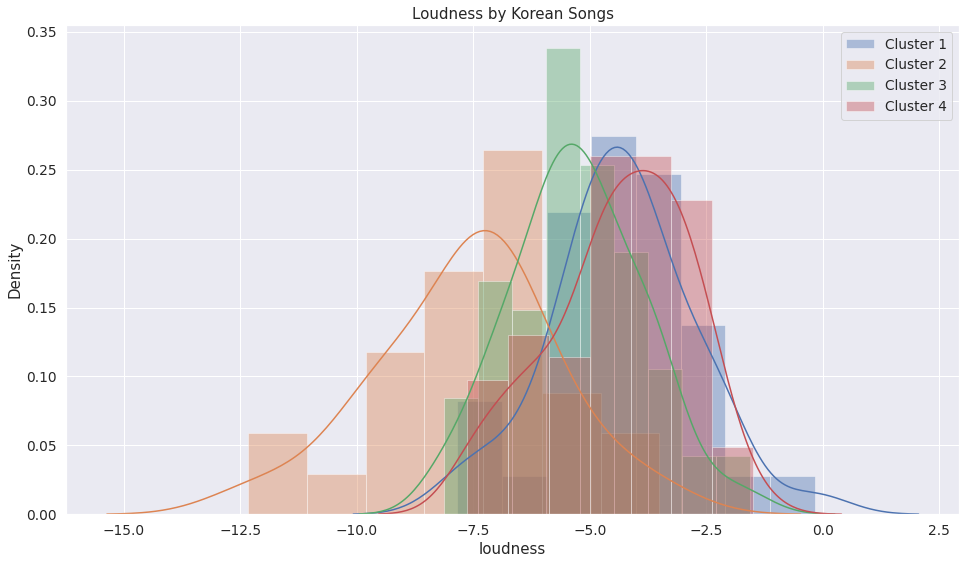

In [ ]:
# loudness dari lagu korea
compare_between_cluster(korean_cluster, 'loudness', 'Loudness by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

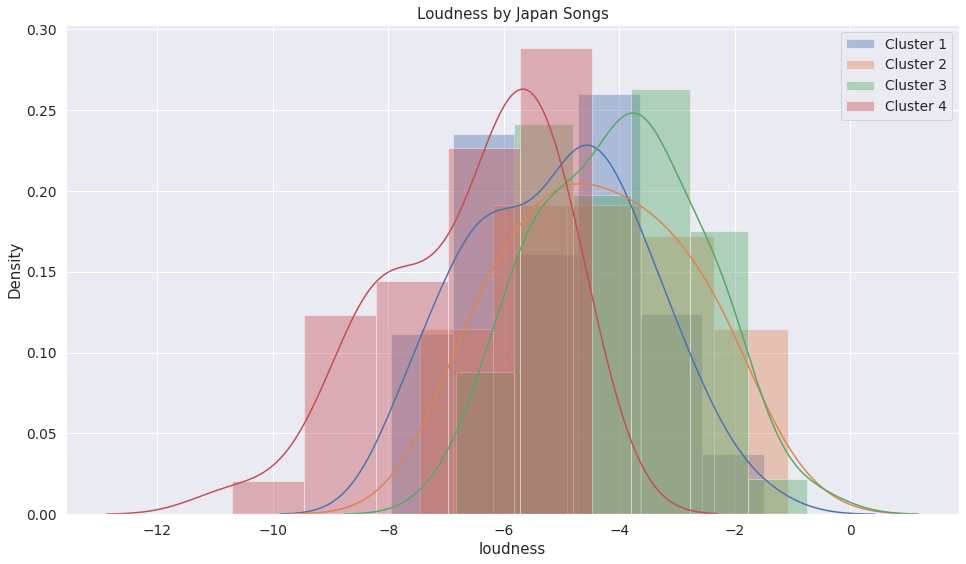

In [ ]:
# loudness dari lagu jepang
compare_between_cluster(japan_cluster, 'loudness', 'Loudness by Japan Songs')

#### Acousticness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

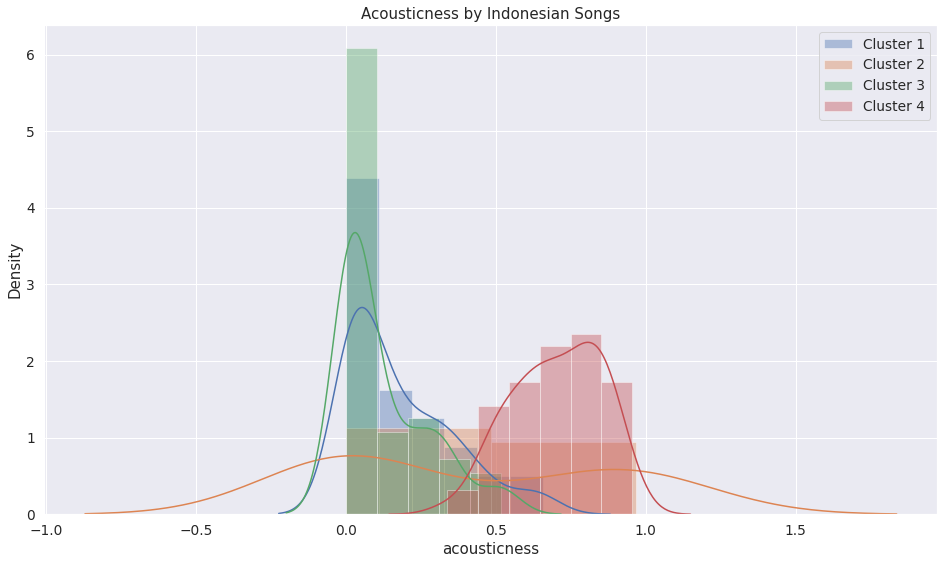

In [ ]:
# acousticness dari lagu indonesia
compare_between_cluster(indo_cluster, 'acousticness', 'Acousticness by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

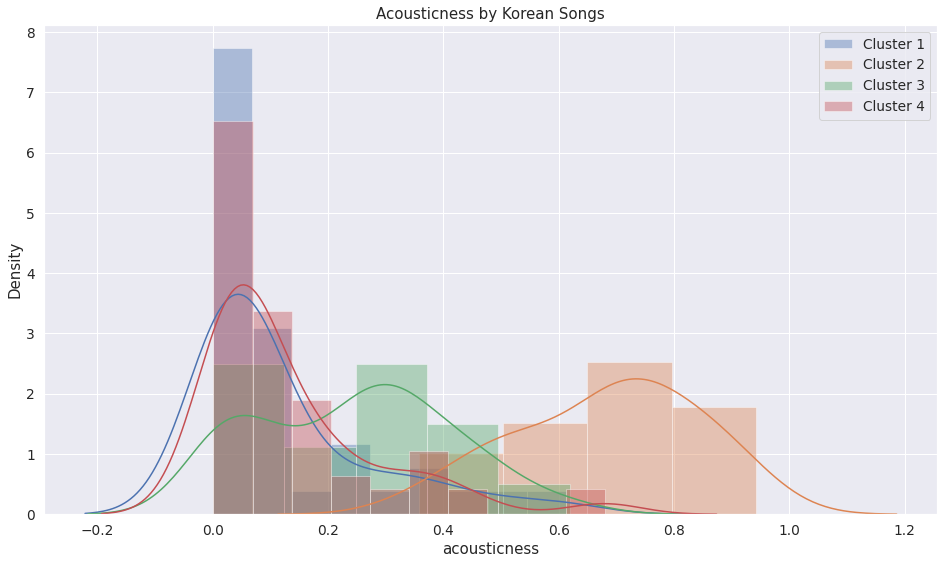

In [ ]:
# acousticness dari lagu korea
compare_between_cluster(korean_cluster, 'acousticness', 'Acousticness by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

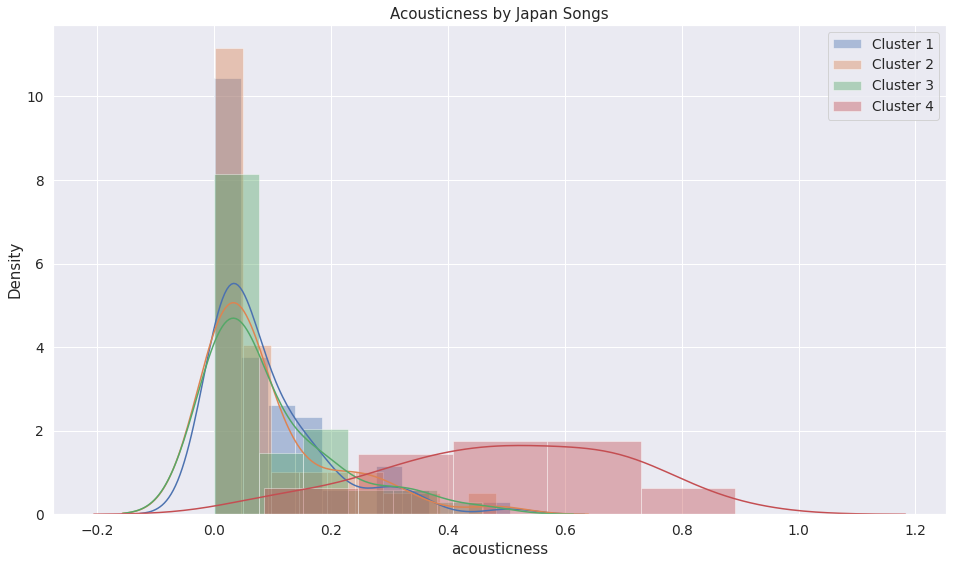

In [ ]:
# acousticness dari lagu jepang
compare_between_cluster(japan_cluster, 'acousticness', 'Acousticness by Japan Songs')

#### Instrumentalness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

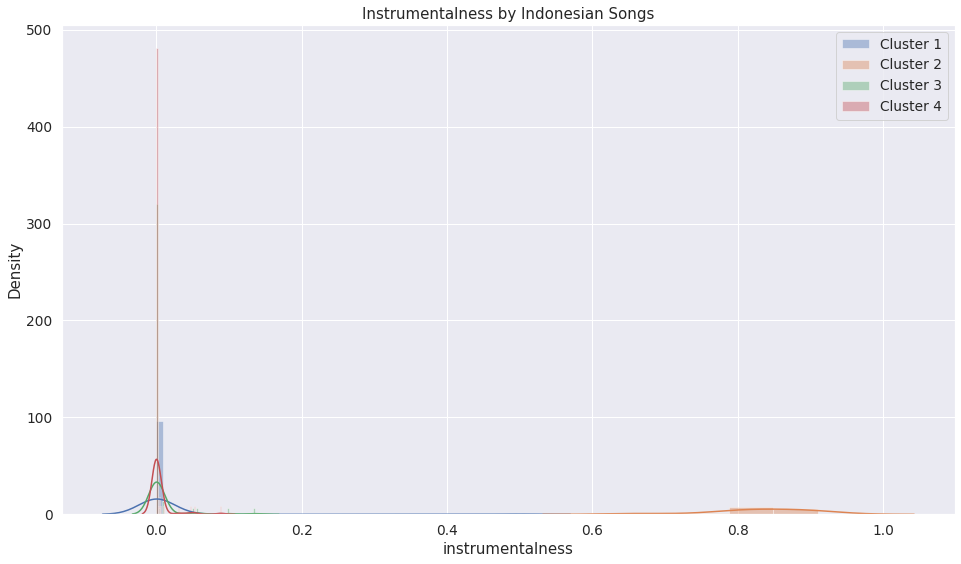

In [ ]:
# instrumentalness dari lagu indonesia
compare_between_cluster(indo_cluster, 'instrumentalness', 'Instrumentalness by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

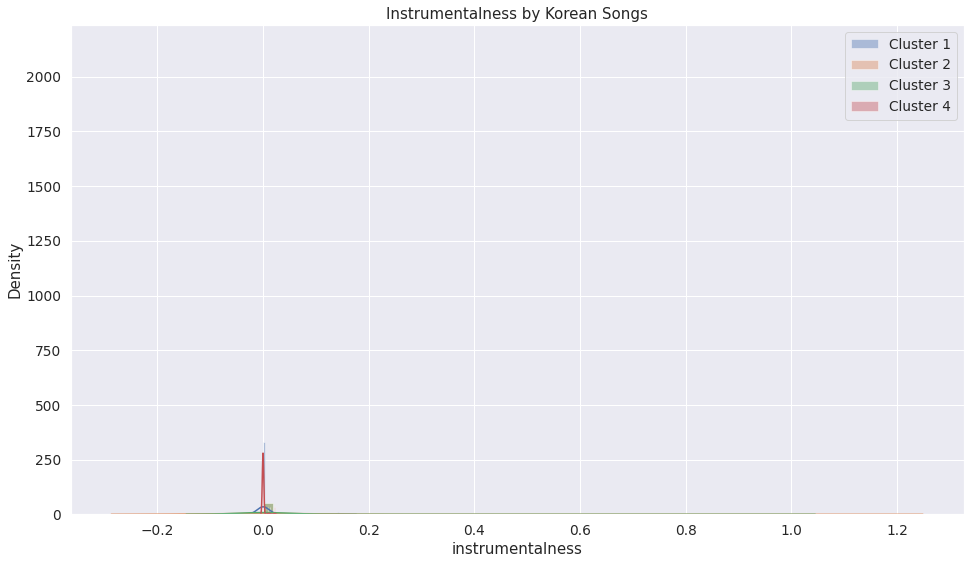

In [ ]:
# instrumentalness dari lagu korea
compare_between_cluster(korean_cluster, 'instrumentalness', 'Instrumentalness by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

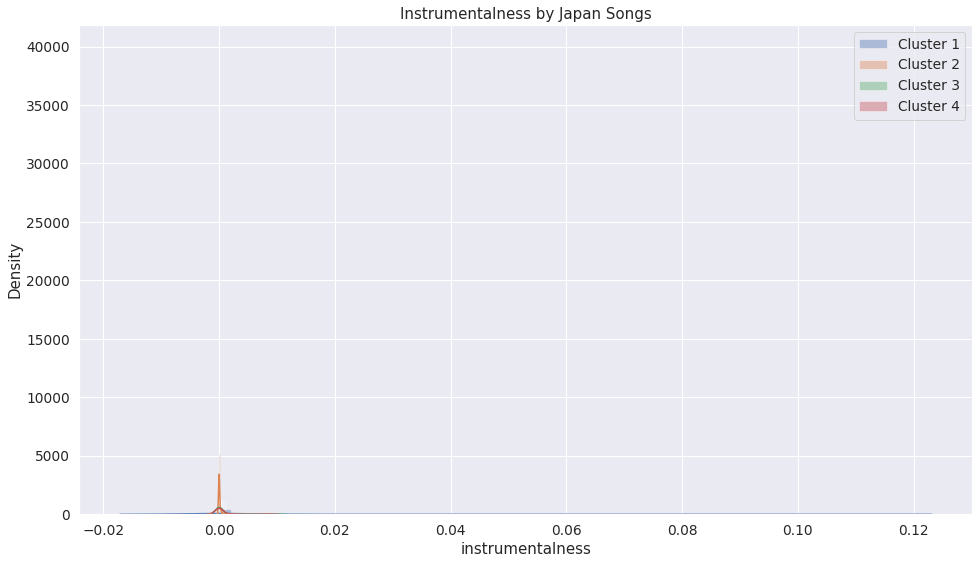

In [ ]:
# instrumentalness dari lagu jepang
compare_between_cluster(japan_cluster, 'instrumentalness', 'Instrumentalness by Japan Songs')

#### Liveness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

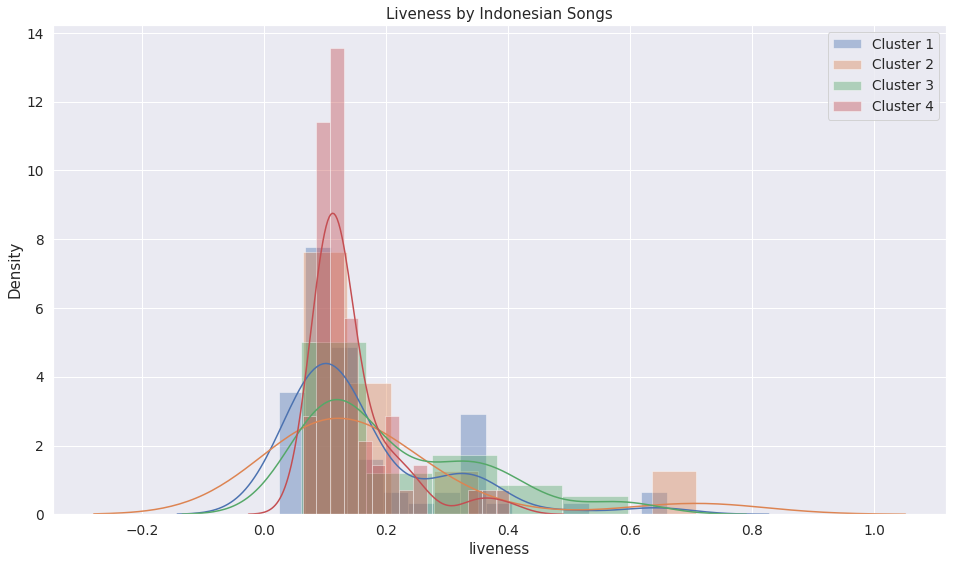

In [ ]:
# liveness dari lagu indonesia
compare_between_cluster(indo_cluster, 'liveness', 'Liveness by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

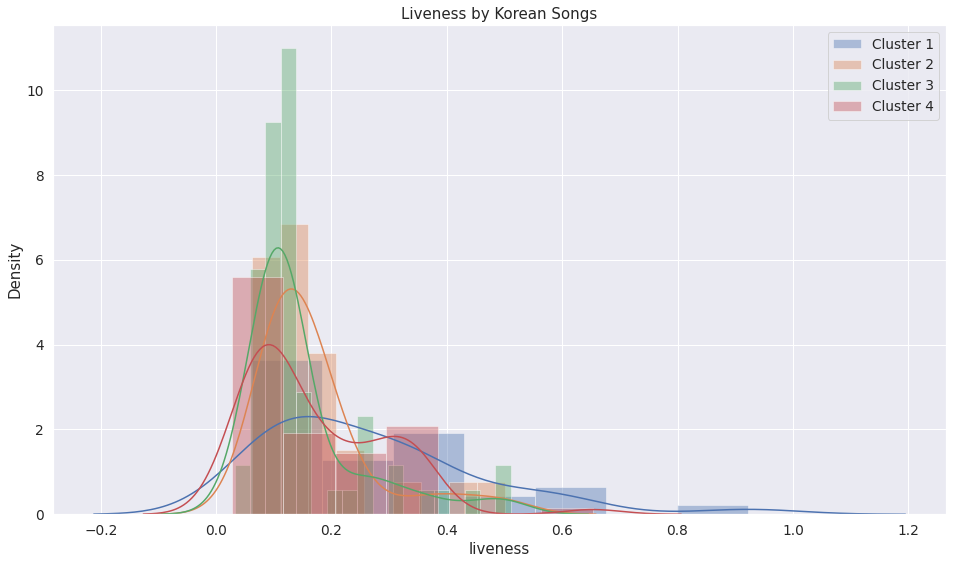

In [ ]:
# liveness dari lagu korea
compare_between_cluster(korean_cluster, 'liveness', 'Liveness by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

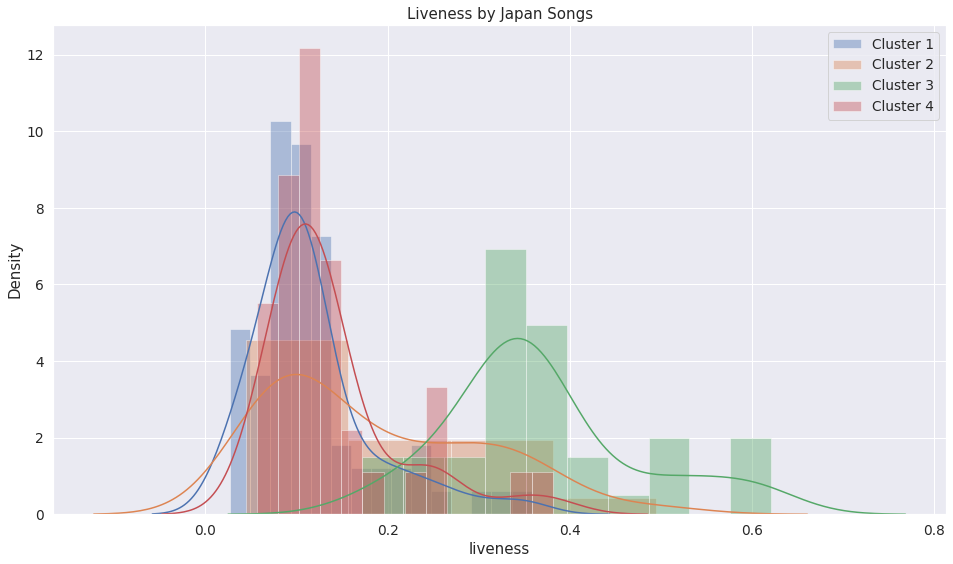

In [ ]:
# liveness dari lagu jepang
compare_between_cluster(japan_cluster, 'liveness', 'Liveness by Japan Songs')

#### Tempo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

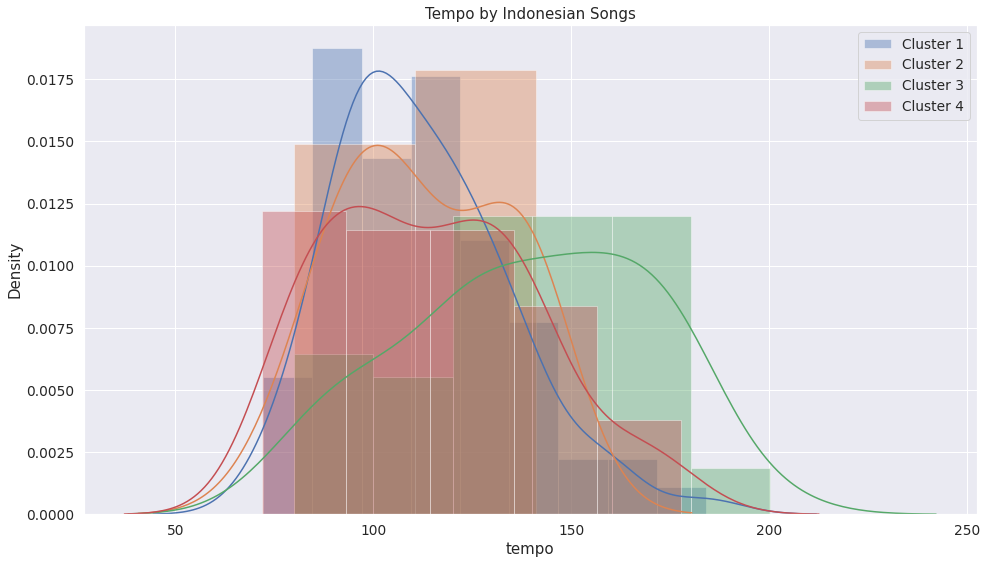

In [ ]:
# tempo dari lagu indonesia
compare_between_cluster(indo_cluster, 'tempo', 'Tempo by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

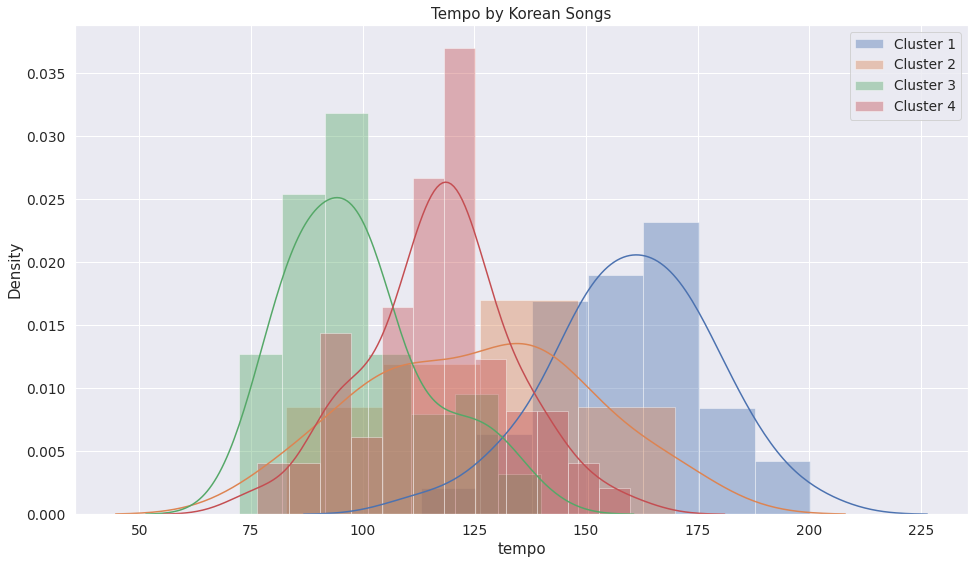

In [ ]:
# tempo dari lagu korea
compare_between_cluster(korean_cluster, 'tempo', 'Tempo by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

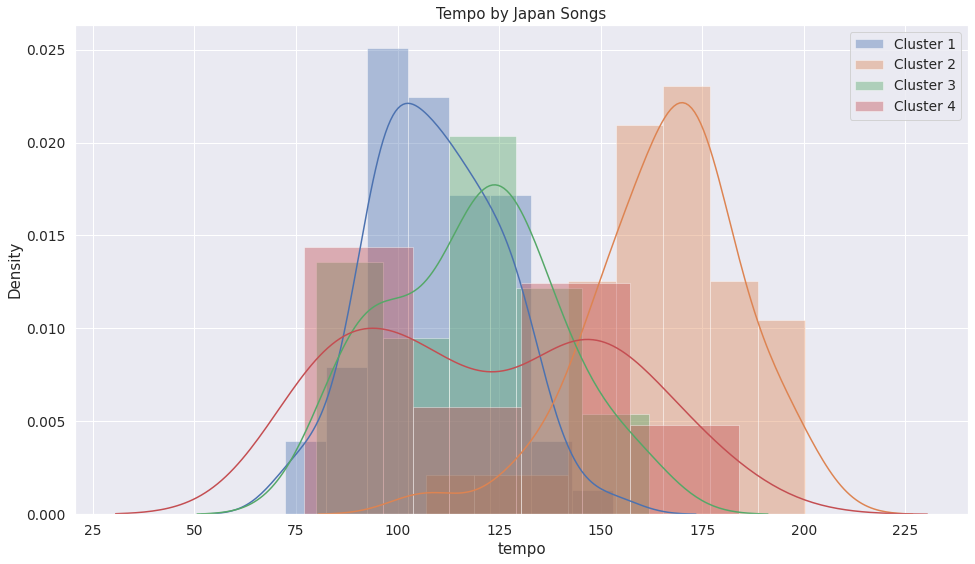

In [ ]:
# tempo dari lagu jepang
compare_between_cluster(japan_cluster, 'tempo', 'Tempo by Japan Songs')

Save al Numpy File for Next Process

In [37]:
np.savetxt('id_label.csv', id_label, delimiter=',')
np.savetxt('jp_label.csv', jp_label, delimiter=',')
np.savetxt('kr_label.csv', kr_label, delimiter=',')

# save all dataset special for clusterd
indo_cluster.to_csv('clustered_indonesia.csv', index=False)
japan_cluster.to_csv('clustered_japan.csv', index=False)
korean_cluster.to_csv('clustered_korean.csv', index=False)